In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from auxiliar import *

import matplotlib.pyplot as plt


In [2]:
data = pd.read_csv('data.csv')

data

,Class,_RMSenergy_Mean,_Lowenergy_Mean,_Fluctuation_Mean,_Tempo_Mean,_MFCC_Mean_1,_MFCC_Mean_2,_MFCC_Mean_3,_MFCC_Mean_4,_MFCC_Mean_5,...,_Chromagram_Mean_9,_Chromagram_Mean_10,_Chromagram_Mean_11,_Chromagram_Mean_12,_HarmonicChangeDetectionFunction_Mean,_HarmonicChangeDetectionFunction_Std,_HarmonicChangeDetectionFunction_Slope,_HarmonicChangeDetectionFunction_PeriodFreq,_HarmonicChangeDetectionFunction_PeriodAmp,_HarmonicChangeDetectionFunction_PeriodEntropy
0,relax,0.052,0.591,9.136,130.043,3.997,0.363,0.887,0.078,0.221,...,0.426,1.000,0.008,0.101,0.316,0.261,0.018,1.035,0.593,0.970
1,relax,0.125,0.439,6.680,142.240,4.058,0.516,0.785,0.397,0.556,...,0.002,1.000,0.000,0.984,0.285,0.211,-0.082,3.364,0.702,0.967
2,relax,0.046,0.639,10.578,188.154,2.775,0.903,0.502,0.329,0.287,...,0.184,0.746,0.016,1.000,0.413,0.299,0.134,1.682,0.692,0.963
3,relax,0.135,0.603,10.442,65.991,2.841,1.552,0.612,0.351,0.011,...,0.038,1.000,0.161,0.757,0.422,0.265,0.042,0.354,0.743,0.968
4,relax,0.066,0.591,9.769,88.890,3.217,0.228,0.814,0.096,0.434,...,0.004,0.404,1.000,0.001,0.345,0.261,0.089,0.748,0.674,0.957
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,angry,0.174,0.578,5.265,161.144,2.985,0.065,0.718,0.046,0.265,...,0.374,0.838,0.413,0.125,0.323,0.140,0.120,2.691,0.867,0.969
396,angry,0.176,0.498,5.042,179.787,2.790,-0.148,0.342,-0.011,0.029,...,0.020,1.000,0.640,0.010,0.233,0.127,0.145,3.364,0.879,0.967
397,angry,0.187,0.557,4.724,134.032,1.672,0.566,0.880,-0.113,0.244,...,0.052,0.184,0.287,0.101,0.269,0.157,0.111,3.364,0.819,0.962
398,angry,0.140,0.573,4.470,113.600,1.997,-0.210,0.694,0.089,0.206,...,0.137,1.000,0.304,0.140,0.277,0.144,0.061,3.364,0.811,0.969


## EDA

The initial problem is composed of 400 observations and 50 explanatory variables. Some variables are in different orders of magnitude, so we might need to scale them in the future in order to have accurate classifications.

In [3]:
print(data["Class"].unique())

['relax' 'happy' 'sad' 'angry']


Our target variable is categorical and has four distinct values, which correspond to basic emotions.

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 51 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Class                                           400 non-null    object 
 1   _RMSenergy_Mean                                 400 non-null    float64
 2   _Lowenergy_Mean                                 400 non-null    float64
 3   _Fluctuation_Mean                               400 non-null    float64
 4   _Tempo_Mean                                     400 non-null    float64
 5   _MFCC_Mean_1                                    400 non-null    float64
 6   _MFCC_Mean_2                                    400 non-null    float64
 7   _MFCC_Mean_3                                    400 non-null    float64
 8   _MFCC_Mean_4                                    400 non-null    float64
 9   _MFCC_Mean_5                               

All of our variables appear to be continuous  since they all have (apart from our Class) dtype = float64

In [5]:

for s in data.columns:
    if data[s].isnull().any():
        print("Has null values")
        break
print("No null values")

No null values


It also seems that we have no missing values.

Now is a good time to analyze correlation. To do that we have to first drop our class variable.

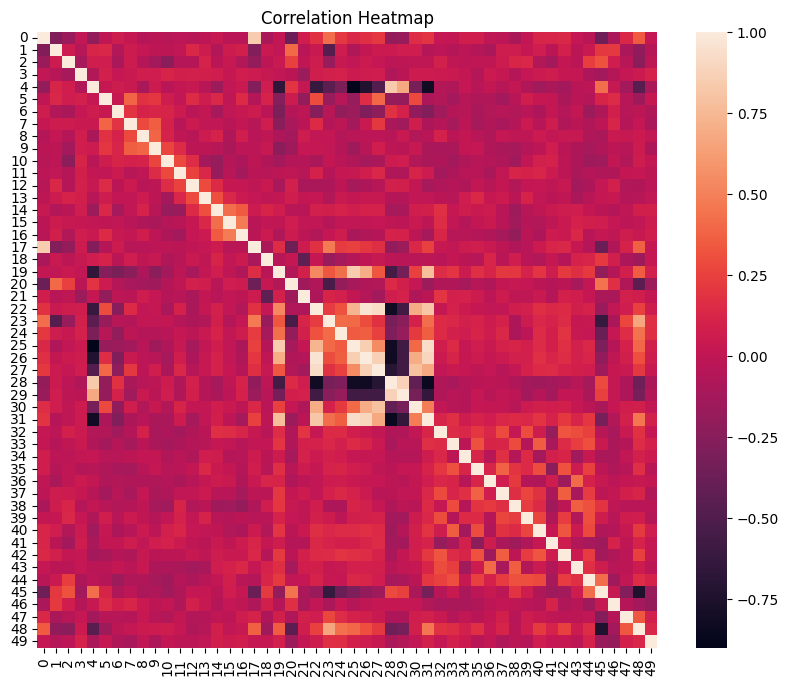

In [6]:

target = data["Class"]
df = data.drop("Class", axis=1)
df_corr = df.corr()

# Set the figure size
plt.figure(figsize=(10, 8))

# Create the heatmap
sns.heatmap(df_corr, xticklabels=range(len(df_corr)), yticklabels=range(len(df_corr)))

# Add title
plt.title('Correlation Heatmap')

# Display the plot
plt.show()

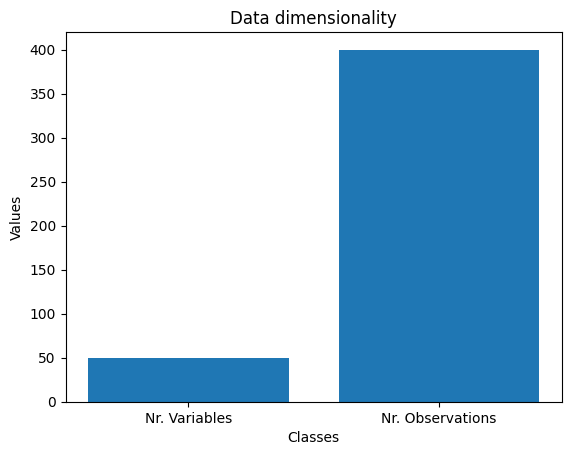

In [7]:
# Define the data
values = [len(df.columns), len(df)]
labels = ['Nr. Variables', 'Nr. Observations']

# Create the bar plot
fig, ax = plt.subplots()
ax.bar(labels, values)

# Add labels and title
ax.set_xlabel('Classes')
ax.set_ylabel('Values')
ax.set_title('Data dimensionality')

# Display the plot
plt.show()

As we can see some of our variables are highly correlated

In [8]:
from sklearn.preprocessing import OneHotEncoder

In [9]:
ohe = OneHotEncoder()

classes = ohe.fit_transform(pd.DataFrame(target)).toarray()
classes.sum(axis=0)

array([100., 100., 100., 100.])

In [10]:
ohe.fit(pd.DataFrame(target)).categories_

[array(['angry', 'happy', 'relax', 'sad'], dtype=object)]

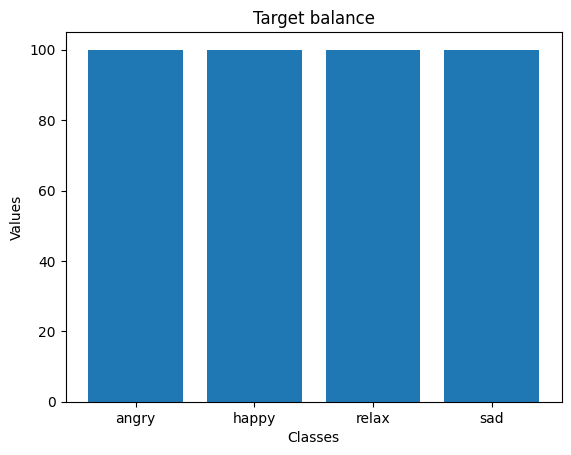

In [11]:
# Define the data
values = classes.sum(axis=0)
labels = ['angry', 'happy', 'relax', 'sad']

# Create the bar plot
fig, ax = plt.subplots()
ax.bar(labels, values)

# Add labels and title
ax.set_xlabel('Classes')
ax.set_ylabel('Values')
ax.set_title('Target balance')

# Display the plot
plt.show()


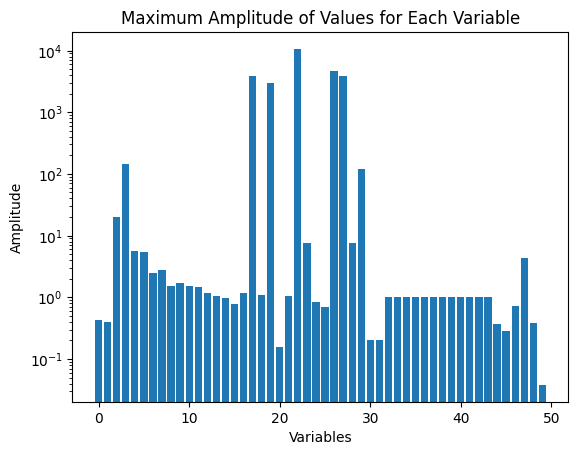

In [12]:
# Get the maximum and minimum values for each variable
var_max = df.max()
var_min = df.min()

# Calculate the amplitude for each variable
amplitude = var_max - var_min

# Create the bar plot
plt.bar(range(len(amplitude.values)), amplitude.values)

plt.yscale('log')

# Add labels and title
plt.xlabel('Variables')
plt.ylabel('Amplitude')
plt.title('Maximum Amplitude of Values for Each Variable')

# Display the plot
plt.show()

In [13]:
seed = 95758

# scale the data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

# Split the data into training and test sets. (0.75, 0.25) split.
train_df, test_df, train_target, test_target = train_test_split(df_scaled, target, test_size=0.25, random_state=seed)

# Forward Feature Selection

## MIM

The Mutual Information Maximization Algorithm chooses iteratively the feature with the highest mutual information between the feature and the target variable. This is easily done with SelectKBest.

In [14]:

filter = MIM(train_df, train_target, 15)

train_df_MIM_15 = train_df[filter]
test_df_MIM_15 = test_df[filter]

filter = MIM(train_df, train_target, 20)

train_df_MIM_20 = train_df[filter]
test_df_MIM_20 = test_df[filter]


In [15]:
train_df_MIM_15

,_Fluctuation_Mean,_MFCC_Mean_1,_MFCC_Mean_2,_MFCC_Mean_4,_Zero-crossingrate_Mean,_AttackTime_Mean,_Eventdensity_Mean,_Pulseclarity_Mean,_Brightness_Mean,_Spectralcentroid_Mean,_Spectralskewness_Mean,_EntropyofSpectrum_Mean,_HarmonicChangeDetectionFunction_Mean,_HarmonicChangeDetectionFunction_Std,_HarmonicChangeDetectionFunction_PeriodAmp
191,-0.096137,-0.616868,-1.086929,0.074539,0.992369,-0.554521,0.747176,-0.872676,1.049406,0.532319,-0.271466,1.004816,0.302747,-0.212562,0.240360
241,0.418948,0.796202,0.145404,0.147136,-0.376237,3.080704,-1.143063,-0.950025,-0.701603,-0.633796,0.322492,-0.338790,1.060179,1.637191,-1.023231
186,-0.336335,-1.610277,-0.541500,-0.382822,2.348906,-0.196958,-0.614098,-0.415027,1.711745,0.837666,-1.162973,1.085432,0.663429,-0.148778,0.379216
3,1.447362,0.481769,2.755269,1.163493,-0.796188,-0.137364,-0.512983,-0.827556,-0.876704,-0.102900,-0.205597,-0.876233,1.691372,1.530883,-0.370607
334,0.812398,0.698489,-0.763022,-0.386452,-0.694996,0.637356,-0.411868,-0.228100,-0.808186,-1.139149,0.610954,-0.365662,0.843770,0.786730,-0.148437
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
246,-0.660404,-0.233536,-1.919032,-1.627859,0.761209,0.041418,-0.437524,-0.827556,0.722044,-0.394735,0.231638,0.225524,0.970009,0.871776,-0.134552
194,0.077754,-0.343775,0.320388,-0.520756,-0.377633,0.279793,-0.336410,-0.047618,0.074932,0.001880,-0.388441,0.333013,0.248645,0.063838,-0.009581
351,-1.120599,-0.616868,-0.023995,0.216103,-0.015997,-0.912084,0.445342,-0.286111,0.524104,0.228969,-0.395255,0.547990,-1.176048,-0.744100,0.059847
153,-0.024122,-1.422368,-0.759299,-0.956338,2.342723,-0.196958,0.807543,1.041716,1.696519,0.756214,-0.580371,1.058560,1.384793,-0.042470,0.670814


In [16]:
train_df_MIM_20

,_Fluctuation_Mean,_MFCC_Mean_1,_MFCC_Mean_2,_MFCC_Mean_4,_MFCC_Mean_7,_MFCC_Mean_13,_Zero-crossingrate_Mean,_AttackTime_Mean,_Rolloff_Mean,_Eventdensity_Mean,_Pulseclarity_Mean,_Brightness_Mean,_Spectralcentroid_Mean,_Spectralskewness_Mean,_EntropyofSpectrum_Mean,_Chromagram_Mean_6,_HarmonicChangeDetectionFunction_Mean,_HarmonicChangeDetectionFunction_Std,_HarmonicChangeDetectionFunction_PeriodAmp,_HarmonicChangeDetectionFunction_PeriodEntropy
191,-0.096137,-0.616868,-1.086929,0.074539,-0.021811,-1.786282,0.992369,-0.554521,0.300888,0.747176,-0.872676,1.049406,0.532319,-0.271466,1.004816,-0.553765,0.302747,-0.212562,0.240360,0.596224
241,0.418948,0.796202,0.145404,0.147136,0.166288,-1.501218,-0.376237,3.080704,-0.500709,-1.143063,-0.950025,-0.701603,-0.633796,0.322492,-0.338790,0.373282,1.060179,1.637191,-1.023231,-0.967642
186,-0.336335,-1.610277,-0.541500,-0.382822,-0.746548,-1.486214,2.348906,-0.196958,0.359983,-0.614098,-0.415027,1.711745,0.837666,-1.162973,1.085432,-0.516136,0.663429,-0.148778,0.379216,0.335580
3,1.447362,0.481769,2.755269,1.163493,-0.071602,0.914324,-0.796188,-0.137364,0.460364,-0.512983,-0.827556,-0.876704,-0.102900,-0.205597,-0.876233,-0.895849,1.691372,1.530883,-0.370607,0.335580
334,0.812398,0.698489,-0.763022,-0.386452,0.393114,0.651765,-0.694996,0.637356,-1.065262,-0.411868,-0.228100,-0.808186,-1.139149,0.610954,-0.365662,-0.714545,0.843770,0.786730,-0.148437,0.596224
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
246,-0.660404,-0.233536,-1.919032,-1.627859,0.061174,-0.158417,0.761209,0.041418,-0.839107,-0.437524,-0.827556,0.722044,-0.394735,0.231638,0.225524,0.359599,0.970009,0.871776,-0.134552,0.596224
194,0.077754,-0.343775,0.320388,-0.520756,0.110965,0.171657,-0.377633,0.279793,0.154236,-0.336410,-0.047618,0.074932,0.001880,-0.388441,0.333013,-0.899270,0.248645,0.063838,-0.009581,0.856868
351,-1.120599,-0.616868,-0.023995,0.216103,0.193950,0.171657,-0.015997,-0.912084,0.222678,0.445342,-0.286111,0.524104,0.228969,-0.395255,0.547990,-0.762437,-1.176048,-0.744100,0.059847,0.596224
153,-0.024122,-1.422368,-0.759299,-0.956338,-0.209911,-0.218430,2.342723,-0.196958,0.218345,0.807543,1.041716,1.696519,0.756214,-0.580371,1.058560,0.999296,1.384793,-0.042470,0.670814,0.596224


## MIFS

This algorithm, and the following, need to be implemented by hand since python doensn't have in-built functions for these algorithms. 

In [17]:
filter = ffs(train_df, train_target, MIFS, 15, beta = 0.5)

train_df_MIFS_15 = train_df[filter]
test_df_MIFS_15 = test_df[filter]

filter = ffs(train_df, train_target, MIFS, 20, beta = 0.5)

train_df_MIFS_20 = train_df[filter]
test_df_MIFS_20 = test_df[filter]

In [18]:
train_df_MIFS_15

,_HarmonicChangeDetectionFunction_Std,_Zero-crossingrate_Mean,_MFCC_Mean_4,_HarmonicChangeDetectionFunction_PeriodFreq,_AttackTime_Mean,_MFCC_Mean_13,_Chromagram_Mean_3,_MFCC_Mean_6,_Tempo_Mean,_Fluctuation_Mean,_HarmonicChangeDetectionFunction_Slope,_Chromagram_Mean_6,_Roughness_Slope,_HarmonicChangeDetectionFunction_PeriodEntropy,_Chromagram_Mean_5
191,-0.212562,0.992369,0.074539,-0.690159,-0.554521,-1.786282,0.200215,-1.328300,-1.917172,-0.096137,0.068420,-0.553765,-0.069148,0.596224,-0.618234
241,1.637191,-0.376237,0.147136,-0.287657,3.080704,-1.501218,-1.101594,0.062371,-1.680300,0.418948,-0.199237,0.373282,0.373169,-0.967642,-0.522569
186,-0.148778,2.348906,-0.382822,-0.086406,-0.196958,-1.486214,0.425409,-0.350407,1.019609,-0.336335,-0.562485,-0.516136,1.039516,0.335580,2.070278
3,1.530883,-0.796188,1.163493,-1.515610,-0.137364,0.914324,-0.259429,0.514462,-1.687290,1.447362,0.402990,-0.895849,0.821230,0.335580,1.262075
334,0.786730,-0.694996,-0.386452,-0.287657,0.637356,0.651765,1.943159,-0.527313,1.701942,0.812398,-0.017613,-0.714545,-0.729751,0.596224,0.061316
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
246,0.871776,0.761209,-1.627859,0.999488,0.041418,-0.158417,0.184791,0.489892,-1.388532,-0.660404,-0.361743,0.359599,-1.361632,0.596224,-0.261965
194,0.063838,-0.377633,-0.520756,0.171884,0.279793,0.171657,-0.694393,0.470236,-0.690844,0.077754,0.613292,-0.899270,-0.017449,0.856868,-0.859045
351,-0.744100,-0.015997,0.216103,-0.782712,-0.912084,0.171657,-1.009049,-0.089964,-0.151208,-1.120599,-0.247033,-0.762437,-0.810172,0.596224,-0.948113
153,-0.042470,2.342723,-0.956338,0.171884,-0.196958,-0.218430,-0.398247,-0.492914,-0.265388,-0.024122,-0.180119,0.999296,1.263547,0.596224,2.142851


In [19]:
train_df_MIFS_20

,_HarmonicChangeDetectionFunction_Std,_Zero-crossingrate_Mean,_MFCC_Mean_4,_MFCC_Mean_13,_HarmonicChangeDetectionFunction_PeriodFreq,_AttackTime_Mean,_Chromagram_Mean_3,_MFCC_Mean_6,_Fluctuation_Mean,_Tempo_Mean,_HarmonicChangeDetectionFunction_Slope,_Chromagram_Mean_6,_Roughness_Slope,_HarmonicChangeDetectionFunction_PeriodEntropy,_AttackTime_Slope,_Chromagram_Mean_5,_MFCC_Mean_3,_MFCC_Mean_11,_MFCC_Mean_8,_Spectralcentroid_Mean
191,-0.212562,0.992369,0.074539,-1.786282,-0.690159,-0.554521,0.200215,-1.328300,-0.096137,-1.917172,0.068420,-0.553765,-0.069148,0.596224,0.560264,-0.618234,-0.374067,-0.057341,0.439652,0.532319
241,1.637191,-0.376237,0.147136,-1.501218,-0.287657,3.080704,-1.101594,0.062371,0.418948,-1.680300,-0.199237,0.373282,0.373169,-0.967642,-0.595126,-0.522569,-2.185520,-0.417674,-0.590794,-0.633796
186,-0.148778,2.348906,-0.382822,-1.486214,-0.086406,-0.196958,0.425409,-0.350407,-0.336335,1.019609,-0.562485,-0.516136,1.039516,0.335580,0.313157,2.070278,-1.237311,-0.726531,-0.487750,0.837666
3,1.530883,-0.796188,1.163493,0.914324,-1.515610,-0.137364,-0.259429,0.514462,1.447362,-1.687290,0.402990,-0.895849,0.821230,0.335580,-0.488269,1.262075,0.421205,0.825107,1.203395,-0.102900
334,0.786730,-0.694996,-0.386452,0.651765,-0.287657,0.637356,1.943159,-0.527313,0.812398,1.701942,-0.017613,-0.714545,-0.729751,0.596224,0.406657,0.061316,0.251275,-0.498565,0.924568,-1.139149
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
246,0.871776,0.761209,-1.627859,-0.158417,0.999488,0.041418,0.184791,0.489892,-0.660404,-1.388532,-0.361743,0.359599,-1.361632,0.596224,0.773978,-0.261965,0.706688,-0.094109,-0.039202,-0.394735
194,0.063838,-0.377633,-0.520756,0.171657,0.171884,0.279793,-0.694393,0.470236,0.077754,-0.690844,0.613292,-0.899270,-0.017449,0.856868,0.139515,-0.859045,-0.387661,1.185440,0.579066,0.001880
351,-0.744100,-0.015997,0.216103,0.171657,-0.782712,-0.912084,-1.009049,-0.089964,-1.120599,-0.151208,-0.247033,-0.762437,-0.810172,0.596224,1.308262,-0.948113,0.397415,-0.020572,-0.602917,0.228969
153,-0.042470,2.342723,-0.956338,-0.218430,0.171884,-0.196958,-0.398247,-0.492914,-0.024122,-0.265388,-0.180119,0.999296,1.263547,0.596224,0.366586,2.142851,0.139122,-0.454442,1.130658,0.756214


## mRMR

In [20]:
filter = ffs(train_df, train_target, mRMR, 15)

train_df_mRMR_15 = train_df[filter]
test_df_mRMR_15 = test_df[filter]

filter = ffs(train_df, train_target, mRMR, 20)

train_df_mRMR_20 = train_df[filter]
test_df_mRMR_20 = test_df[filter]

In [21]:
train_df_mRMR_15

,_HarmonicChangeDetectionFunction_Std,_Zero-crossingrate_Mean,_HarmonicChangeDetectionFunction_PeriodFreq,_MFCC_Mean_4,_HarmonicChangeDetectionFunction_PeriodAmp,_Fluctuation_Mean,_AttackTime_Mean,_Chromagram_Mean_6,_Pulseclarity_Mean,_EntropyofSpectrum_Mean,_Eventdensity_Mean,_HarmonicChangeDetectionFunction_Mean,_MFCC_Mean_7,_MFCC_Mean_6,_MFCC_Mean_13
191,-0.212562,0.992369,-0.690159,0.074539,0.240360,-0.096137,-0.554521,-0.553765,-0.872676,1.004816,0.747176,0.302747,-0.021811,-1.328300,-1.786282
241,1.637191,-0.376237,-0.287657,0.147136,-1.023231,0.418948,3.080704,0.373282,-0.950025,-0.338790,-1.143063,1.060179,0.166288,0.062371,-1.501218
186,-0.148778,2.348906,-0.086406,-0.382822,0.379216,-0.336335,-0.196958,-0.516136,-0.415027,1.085432,-0.614098,0.663429,-0.746548,-0.350407,-1.486214
3,1.530883,-0.796188,-1.515610,1.163493,-0.370607,1.447362,-0.137364,-0.895849,-0.827556,-0.876233,-0.512983,1.691372,-0.071602,0.514462,0.914324
334,0.786730,-0.694996,-0.287657,-0.386452,-0.148437,0.812398,0.637356,-0.714545,-0.228100,-0.365662,-0.411868,0.843770,0.393114,-0.527313,0.651765
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
246,0.871776,0.761209,0.999488,-1.627859,-0.134552,-0.660404,0.041418,0.359599,-0.827556,0.225524,-0.437524,0.970009,0.061174,0.489892,-0.158417
194,0.063838,-0.377633,0.171884,-0.520756,-0.009581,0.077754,0.279793,-0.899270,-0.047618,0.333013,-0.336410,0.248645,0.110965,0.470236,0.171657
351,-0.744100,-0.015997,-0.782712,0.216103,0.059847,-1.120599,-0.912084,-0.762437,-0.286111,0.547990,0.445342,-1.176048,0.193950,-0.089964,0.171657
153,-0.042470,2.342723,0.171884,-0.956338,0.670814,-0.024122,-0.196958,0.999296,1.041716,1.058560,0.807543,1.384793,-0.209911,-0.492914,-0.218430


In [22]:
train_df_mRMR_20

,_HarmonicChangeDetectionFunction_Std,_Zero-crossingrate_Mean,_MFCC_Mean_4,_HarmonicChangeDetectionFunction_PeriodAmp,_Fluctuation_Mean,_AttackTime_Mean,_MFCC_Mean_13,_Pulseclarity_Mean,_Chromagram_Mean_6,_EntropyofSpectrum_Mean,_HarmonicChangeDetectionFunction_Mean,_Eventdensity_Mean,_MFCC_Mean_7,_HarmonicChangeDetectionFunction_PeriodFreq,_MFCC_Mean_2,_HarmonicChangeDetectionFunction_PeriodEntropy,_MFCC_Mean_6,_Chromagram_Mean_3,_Tempo_Mean,_Chromagram_Mean_1
191,-0.212562,0.992369,0.074539,0.240360,-0.096137,-0.554521,-1.786282,-0.872676,-0.553765,1.004816,0.302747,0.747176,-0.021811,-0.690159,-1.086929,0.596224,-1.328300,0.200215,-1.917172,-1.067851
241,1.637191,-0.376237,0.147136,-1.023231,0.418948,3.080704,-1.501218,-0.950025,0.373282,-0.338790,1.060179,-1.143063,0.166288,-0.287657,0.145404,-0.967642,0.062371,-1.101594,-1.680300,-1.083347
186,-0.148778,2.348906,-0.382822,0.379216,-0.336335,-0.196958,-1.486214,-0.415027,-0.516136,1.085432,0.663429,-0.614098,-0.746548,-0.086406,-0.541500,0.335580,-0.350407,0.425409,1.019609,1.538553
3,1.530883,-0.796188,1.163493,-0.370607,1.447362,-0.137364,0.914324,-0.827556,-0.895849,-0.876233,1.691372,-0.512983,-0.071602,-1.515610,2.755269,0.335580,0.514462,-0.259429,-1.687290,-0.141198
334,0.786730,-0.694996,-0.386452,-0.148437,0.812398,0.637356,0.651765,-0.228100,-0.714545,-0.365662,0.843770,-0.411868,0.393114,-0.287657,-0.763022,0.596224,-0.527313,1.943159,1.701942,0.450744
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
246,0.871776,0.761209,-1.627859,-0.134552,-0.660404,0.041418,-0.158417,-0.827556,0.359599,0.225524,0.970009,-0.437524,0.061174,0.999488,-1.919032,0.596224,0.489892,0.184791,-1.388532,-0.987273
194,0.063838,-0.377633,-0.520756,-0.009581,0.077754,0.279793,0.171657,-0.047618,-0.899270,0.333013,0.248645,-0.336410,0.110965,0.171884,0.320388,0.856868,0.470236,-0.694393,-0.690844,-0.190785
351,-0.744100,-0.015997,0.216103,0.059847,-1.120599,-0.912084,0.171657,-0.286111,-0.762437,0.547990,-1.176048,0.445342,0.193950,-0.782712,-0.023995,0.596224,-0.089964,-1.009049,-0.151208,-0.299256
153,-0.042470,2.342723,-0.956338,0.670814,-0.024122,-0.196958,-0.218430,1.041716,0.999296,1.058560,1.384793,0.807543,-0.209911,0.171884,-0.759299,0.596224,-0.492914,-0.398247,-0.265388,1.606735


## MaxMIFS

In [23]:
filter = ffs(train_df, train_target, maxMIFS, 15)

train_df_maxMIFS_15 = train_df[filter]
test_df_maxMIFS_15 = test_df[filter]

filter = ffs(train_df, train_target, maxMIFS, 20)

train_df_maxMIFS_20 = train_df[filter]
test_df_maxMIFS_20 = test_df[filter]

In [24]:
train_df_maxMIFS_15

,_HarmonicChangeDetectionFunction_Std,_Zero-crossingrate_Mean,_MFCC_Mean_4,_AttackTime_Mean,_Chromagram_Mean_6,_MFCC_Mean_13,_MFCC_Mean_7,_Pulseclarity_Mean,_Fluctuation_Mean,_MFCC_Mean_6,_MFCC_Mean_2,_HarmonicChangeDetectionFunction_PeriodFreq,_HarmonicChangeDetectionFunction_Slope,_Chromagram_Mean_7,_Tempo_Mean
191,-0.212562,0.992369,0.074539,-0.554521,-0.553765,-1.786282,-0.021811,-0.872676,-0.096137,-1.328300,-1.086929,-0.690159,0.068420,-0.355045,-1.917172
241,1.637191,-0.376237,0.147136,3.080704,0.373282,-1.501218,0.166288,-0.950025,0.418948,0.062371,0.145404,-0.287657,-0.199237,0.810317,-1.680300
186,-0.148778,2.348906,-0.382822,-0.196958,-0.516136,-1.486214,-0.746548,-0.415027,-0.336335,-0.350407,-0.541500,-0.086406,-0.562485,2.748959,1.019609
3,1.530883,-0.796188,1.163493,-0.137364,-0.895849,0.914324,-0.071602,-0.827556,1.447362,0.514462,2.755269,-1.515610,0.402990,0.120539,-1.687290
334,0.786730,-0.694996,-0.386452,0.637356,-0.714545,0.651765,0.393114,-0.228100,0.812398,-0.527313,-0.763022,-0.287657,-0.017613,-0.322372,1.701942
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
246,0.871776,0.761209,-1.627859,0.041418,0.359599,-0.158417,0.061174,-0.827556,-0.660404,0.489892,-1.919032,0.999488,-0.361743,-0.569240,-1.388532
194,0.063838,-0.377633,-0.520756,0.279793,-0.899270,0.171657,0.110965,-0.047618,0.077754,0.470236,0.320388,0.171884,0.613292,-0.881455,-0.690844
351,-0.744100,-0.015997,0.216103,-0.912084,-0.762437,0.171657,0.193950,-0.286111,-1.120599,-0.089964,-0.023995,-0.782712,-0.247033,-0.794326,-0.151208
153,-0.042470,2.342723,-0.956338,-0.196958,0.999296,-0.218430,-0.209911,1.041716,-0.024122,-0.492914,-0.759299,0.171884,-0.180119,0.890187,-0.265388


In [25]:
train_df_maxMIFS_20

,_HarmonicChangeDetectionFunction_Std,_Zero-crossingrate_Mean,_Chromagram_Mean_6,_MFCC_Mean_4,_MFCC_Mean_13,_AttackTime_Mean,_Pulseclarity_Mean,_MFCC_Mean_7,_Chromagram_Mean_7,_Fluctuation_Mean,_MFCC_Mean_6,_MFCC_Mean_2,_Tempo_Mean,_HarmonicChangeDetectionFunction_Slope,_Chromagram_Mean_3,_HarmonicChangeDetectionFunction_PeriodEntropy,_HarmonicChangeDetectionFunction_PeriodFreq,_MFCC_Mean_3,_MFCC_Mean_11,_AttackTime_Slope
191,-0.212562,0.992369,-0.553765,0.074539,-1.786282,-0.554521,-0.872676,-0.021811,-0.355045,-0.096137,-1.328300,-1.086929,-1.917172,0.068420,0.200215,0.596224,-0.690159,-0.374067,-0.057341,0.560264
241,1.637191,-0.376237,0.373282,0.147136,-1.501218,3.080704,-0.950025,0.166288,0.810317,0.418948,0.062371,0.145404,-1.680300,-0.199237,-1.101594,-0.967642,-0.287657,-2.185520,-0.417674,-0.595126
186,-0.148778,2.348906,-0.516136,-0.382822,-1.486214,-0.196958,-0.415027,-0.746548,2.748959,-0.336335,-0.350407,-0.541500,1.019609,-0.562485,0.425409,0.335580,-0.086406,-1.237311,-0.726531,0.313157
3,1.530883,-0.796188,-0.895849,1.163493,0.914324,-0.137364,-0.827556,-0.071602,0.120539,1.447362,0.514462,2.755269,-1.687290,0.402990,-0.259429,0.335580,-1.515610,0.421205,0.825107,-0.488269
334,0.786730,-0.694996,-0.714545,-0.386452,0.651765,0.637356,-0.228100,0.393114,-0.322372,0.812398,-0.527313,-0.763022,1.701942,-0.017613,1.943159,0.596224,-0.287657,0.251275,-0.498565,0.406657
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
246,0.871776,0.761209,0.359599,-1.627859,-0.158417,0.041418,-0.827556,0.061174,-0.569240,-0.660404,0.489892,-1.919032,-1.388532,-0.361743,0.184791,0.596224,0.999488,0.706688,-0.094109,0.773978
194,0.063838,-0.377633,-0.899270,-0.520756,0.171657,0.279793,-0.047618,0.110965,-0.881455,0.077754,0.470236,0.320388,-0.690844,0.613292,-0.694393,0.856868,0.171884,-0.387661,1.185440,0.139515
351,-0.744100,-0.015997,-0.762437,0.216103,0.171657,-0.912084,-0.286111,0.193950,-0.794326,-1.120599,-0.089964,-0.023995,-0.151208,-0.247033,-1.009049,0.596224,-0.782712,0.397415,-0.020572,1.308262
153,-0.042470,2.342723,0.999296,-0.956338,-0.218430,-0.196958,1.041716,-0.209911,0.890187,-0.024122,-0.492914,-0.759299,-0.265388,-0.180119,-0.398247,0.596224,0.171884,0.139122,-0.454442,0.366586


# Classification

Remember the variables were previously scaled

## KNN = 5

In [35]:
from sklearn.neighbors import KNeighborsClassifier

kNN = KNeighborsClassifier(n_neighbors=5, metric='euclidean')

# Since we are dealing with kNN we should scale the data

knn_MIM_15 = kNN.fit(train_df_MIM_15, train_target)
pred_MIM_15 = knn_MIM_15.predict(test_df_MIM_15)

knn_MIM_20 = kNN.fit(train_df_MIM_20, train_target)
pred_MIM_20 = knn_MIM_20.predict(test_df_MIM_20)

knn_MIFS_15 = kNN.fit(train_df_MIFS_15, train_target)
pred_MIFS_15 = knn_MIFS_15.predict(test_df_MIFS_15)

knn_MIFS_20 = kNN.fit(train_df_MIFS_20, train_target)
pred_MIFS_20 = knn_MIFS_20.predict(test_df_MIFS_20)

knn_mRMR_15 = kNN.fit(train_df_mRMR_15, train_target)
pred_mRMR_15 = knn_mRMR_15.predict(test_df_mRMR_15)

knn_mRMR_20 = kNN.fit(train_df_mRMR_20, train_target)
pred_mRMR_20 = knn_mRMR_20.predict(test_df_mRMR_20)

knn_maxMIFS_15 = kNN.fit(train_df_maxMIFS_15, train_target)
pred_maxMIFS_15 = knn_maxMIFS_15.predict(test_df_maxMIFS_15)

knn_maxMIFS_20 = kNN.fit(train_df_maxMIFS_20, train_target)
pred_maxMIFS_20 = knn_maxMIFS_20.predict(test_df_maxMIFS_20)

# Evaluate
acc, macro_rec, macro_pre, macro_f1 = get_metrics(test_target, pred_MIM_15)
print("MIM 15: Accuracy: ", "%.4f" % acc, " Macro_Recall: ", "%.4f" % macro_rec, " Macro_Precision: ", "%.4f" % macro_pre, " Macro_F1: ", "%.4f" % macro_f1)

acc, macro_rec, macro_pre, macro_f1 = get_metrics(test_target, pred_MIM_20)
print("MIM 20: Accuracy: ", "%.4f" % acc, " Macro_Recall: ", "%.4f" % macro_rec, " Macro_Precision: ", "%.4f" % macro_pre, " Macro_F1: ", "%.4f" % macro_f1)

acc, macro_rec, macro_pre, macro_f1 = get_metrics(test_target, pred_MIFS_15)
print("MIFS 15: Accuracy: ", "%.4f" % acc, " Macro_Recall: ", "%.4f" % macro_rec, " Macro_Precision: ", "%.4f" % macro_pre, " Macro_F1: ", "%.4f" % macro_f1)

acc, macro_rec, macro_pre, macro_f1 = get_metrics(test_target, pred_MIFS_20)
print("MIFS 20: Accuracy: ", "%.4f" % acc, " Macro_Recall: ", "%.4f" % macro_rec, " Macro_Precision: ", "%.4f" % macro_pre, " Macro_F1: ", "%.4f" % macro_f1)

acc, macro_rec, macro_pre, macro_f1 = get_metrics(test_target, pred_mRMR_15)
print("mRMR 15: Accuracy: ", "%.4f" % acc, " Macro_Recall: ", "%.4f" % macro_rec, " Macro_Precision: ", "%.4f" % macro_pre, " Macro_F1: ", "%.4f" % macro_f1)

acc, macro_rec, macro_pre, macro_f1 = get_metrics(test_target, pred_mRMR_20)
print("mRMR 20: Accuracy: ", "%.4f" % acc, " Macro_Recall: ", "%.4f" % macro_rec, " Macro_Precision: ", "%.4f" % macro_pre, " Macro_F1: ", "%.4f" % macro_f1)

acc, macro_rec, macro_pre, macro_f1 = get_metrics(test_target, pred_maxMIFS_15)
print("maxMIFS 15: Accuracy: ", "%.4f" % acc, " Macro_Recall: ", "%.4f" % macro_rec, " Macro_Precision: ", "%.4f" % macro_pre, " Macro_F1: ", "%.4f" % macro_f1)

acc, macro_rec, macro_pre, macro_f1 = get_metrics(test_target, pred_maxMIFS_20)
print("maxMIFS 20: Accuracy: ", "%.4f" % acc, " Macro_Recall: ", "%.4f" % macro_rec, " Macro_Precision: ", "%.4f" % macro_pre, " Macro_F1: ", "%.4f" % macro_f1)


MIM 15: Accuracy:  0.8000  Macro_Recall:  0.8089  Macro_Precision:  0.8210  Macro_F1:  0.8142
MIM 20: Accuracy:  0.7100  Macro_Recall:  0.7308  Macro_Precision:  0.7070  Macro_F1:  0.7120
MIFS 15: Accuracy:  0.6600  Macro_Recall:  0.6762  Macro_Precision:  0.6462  Macro_F1:  0.6514
MIFS 20: Accuracy:  0.6400  Macro_Recall:  0.6578  Macro_Precision:  0.6329  Macro_F1:  0.6272
mRMR 15: Accuracy:  0.7400  Macro_Recall:  0.7568  Macro_Precision:  0.7402  Macro_F1:  0.7424
mRMR 20: Accuracy:  0.7200  Macro_Recall:  0.7350  Macro_Precision:  0.7290  Macro_F1:  0.7285
maxMIFS 15: Accuracy:  0.6600  Macro_Recall:  0.6704  Macro_Precision:  0.6863  Macro_F1:  0.6710
maxMIFS 20: Accuracy:  0.6600  Macro_Recall:  0.6754  Macro_Precision:  0.6459  Macro_F1:  0.6504


## Gaussian Naive Bayes

Since we standardized our variables we can assume they follow a normal distribution

In [36]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()

gnb_MIM_15 = gnb.fit(train_df_MIM_15, train_target)
pred_MIM_15 = gnb_MIM_15.predict(test_df_MIM_15)

gnb_MIM_20 = gnb.fit(train_df_MIM_20, train_target)
pred_MIM_20 = gnb_MIM_20.predict(test_df_MIM_20)

gnb_MIFS_15 = gnb.fit(train_df_MIFS_15, train_target)
pred_MIFS_15 = gnb_MIFS_15.predict(test_df_MIFS_15)

gnb_MIFS_20 = gnb.fit(train_df_MIFS_20, train_target)
pred_MIFS_20 = gnb_MIFS_20.predict(test_df_MIFS_20)

gnb_mRMR_15 = gnb.fit(train_df_mRMR_15, train_target)
pred_mRMR_15 = gnb_mRMR_15.predict(test_df_mRMR_15)

gnb_mRMR_20 = gnb.fit(train_df_mRMR_20, train_target)
pred_mRMR_20 = gnb_mRMR_20.predict(test_df_mRMR_20)

gnb_maxMIFS_15 = gnb.fit(train_df_maxMIFS_15, train_target)
pred_maxMIFS_15 = gnb_maxMIFS_15.predict(test_df_maxMIFS_15)

gnb_maxMIFS_20 = gnb.fit(train_df_maxMIFS_20, train_target)
pred_maxMIFS_20 = gnb_maxMIFS_20.predict(test_df_maxMIFS_20)

# Evaluate
acc, macro_rec, macro_pre, macro_f1 = get_metrics(test_target, pred_MIM_15)
print("MIM 15: Accuracy: ", "%.4f" % acc, " Macro_Recall: ", "%.4f" % macro_rec, " Macro_Precision: ",
        "%.4f" % macro_pre, " Macro_F1: ", "%.4f" % macro_f1)

acc, macro_rec, macro_pre, macro_f1 = get_metrics(test_target, pred_MIM_20)
print("MIM 20: Accuracy: ", "%.4f" % acc, " Macro_Recall: ", "%.4f" % macro_rec, " Macro_Precision: ",
        "%.4f" % macro_pre, " Macro_F1: ", "%.4f" % macro_f1)

acc, macro_rec, macro_pre, macro_f1 = get_metrics(test_target, pred_MIFS_15)
print("MIFS 15: Accuracy: ", "%.4f" % acc, " Macro_Recall: ", "%.4f" % macro_rec, " Macro_Precision: ",
        "%.4f" % macro_pre, " Macro_F1: ", "%.4f" % macro_f1)

acc, macro_rec, macro_pre, macro_f1 = get_metrics(test_target, pred_MIFS_20)
print("MIFS 20: Accuracy: ", "%.4f" % acc, " Macro_Recall: ", "%.4f" % macro_rec, " Macro_Precision: ",
        "%.4f" % macro_pre, " Macro_F1: ", "%.4f" % macro_f1)

acc, macro_rec, macro_pre, macro_f1 = get_metrics(test_target, pred_mRMR_15)
print("mRMR 15: Accuracy: ", "%.4f" % acc, " Macro_Recall: ", "%.4f" % macro_rec, " Macro_Precision: ",
        "%.4f" % macro_pre, " Macro_F1: ", "%.4f" % macro_f1)

acc, macro_rec, macro_pre, macro_f1 = get_metrics(test_target, pred_mRMR_20)
print("mRMR 20: Accuracy: ", "%.4f" % acc, " Macro_Recall: ", "%.4f" % macro_rec, " Macro_Precision: ",
        "%.4f" % macro_pre, " Macro_F1: ", "%.4f" % macro_f1)

acc, macro_rec, macro_pre, macro_f1 = get_metrics(test_target, pred_maxMIFS_15) 
print("maxMIFS 15: Accuracy: ", "%.4f" % acc, " Macro_Recall: ", "%.4f" % macro_rec, " Macro_Precision: ",
        "%.4f" % macro_pre, " Macro_F1: ", "%.4f" % macro_f1)


acc, macro_rec, macro_pre, macro_f1 = get_metrics(test_target, pred_maxMIFS_20)
print("maxMIFS 20: Accuracy: ", "%.4f" % acc, " Macro_Recall: ", "%.4f" % macro_rec, " Macro_Precision: ",
        "%.4f" % macro_pre, " Macro_F1: ", "%.4f" % macro_f1)

MIM 15: Accuracy:  0.6600  Macro_Recall:  0.6712  Macro_Precision:  0.6691  Macro_F1:  0.6701
MIM 20: Accuracy:  0.7700  Macro_Recall:  0.7818  Macro_Precision:  0.7769  Macro_F1:  0.7781
MIFS 15: Accuracy:  0.6900  Macro_Recall:  0.7030  Macro_Precision:  0.6897  Macro_F1:  0.6937
MIFS 20: Accuracy:  0.7400  Macro_Recall:  0.7480  Macro_Precision:  0.7488  Macro_F1:  0.7471
mRMR 15: Accuracy:  0.7100  Macro_Recall:  0.7250  Macro_Precision:  0.7280  Macro_F1:  0.7251
mRMR 20: Accuracy:  0.7300  Macro_Recall:  0.7439  Macro_Precision:  0.7423  Macro_F1:  0.7424
maxMIFS 15: Accuracy:  0.7200  Macro_Recall:  0.7334  Macro_Precision:  0.7244  Macro_F1:  0.7276
maxMIFS 20: Accuracy:  0.7400  Macro_Recall:  0.7491  Macro_Precision:  0.7520  Macro_F1:  0.7501


In [31]:
from sklearn import svm

svm = svm.SVC()

svm_MIM_15 = svm.fit(train_df_MIM_15, train_target)
pred_MIM_15 = svm_MIM_15.predict(test_df_MIM_15)

svm_MIM_20 = svm.fit(train_df_MIM_20, train_target)
pred_MIM_20 = svm_MIM_20.predict(test_df_MIM_20)

svm_MIFS_15 = svm.fit(train_df_MIFS_15, train_target)
pred_MIFS_15 = svm_MIFS_15.predict(test_df_MIFS_15)

svm_MIFS_20 = svm.fit(train_df_MIFS_20, train_target)
pred_MIFS_20 = svm_MIFS_20.predict(test_df_MIFS_20)

svm_mRMR_15 = svm.fit(train_df_mRMR_15, train_target)
pred_mRMR_15 = svm_mRMR_15.predict(test_df_mRMR_15)

svm_mRMR_20 = svm.fit(train_df_mRMR_20, train_target)
pred_mRMR_20 = svm_mRMR_20.predict(test_df_mRMR_20)

svm_maxMIFS_15 = svm.fit(train_df_maxMIFS_15, train_target)
pred_maxMIFS_15 = svm_maxMIFS_15.predict(test_df_maxMIFS_15)

svm_maxMIFS_20 = svm.fit(train_df_maxMIFS_20, train_target)
pred_maxMIFS_20 = svm_maxMIFS_20.predict(test_df_maxMIFS_20)

# Evaluate
acc, macro_rec, macro_pre, macro_f1 = get_metrics(test_target, pred_MIM_15)
print("MIM 15: Accuracy: ", "%.4f" % acc, " Macro_Recall: ", "%.4f" % macro_rec, " Macro_Precision: ",
        "%.4f" % macro_pre, " Macro_F1: ", "%.4f" % macro_f1)

acc, macro_rec, macro_pre, macro_f1 = get_metrics(test_target, pred_MIM_20)
print("MIM 20: Accuracy: ", "%.4f" % acc, " Macro_Recall: ", "%.4f" % macro_rec, " Macro_Precision: ",
        "%.4f" % macro_pre, " Macro_F1: ", "%.4f" % macro_f1)

acc, macro_rec, macro_pre, macro_f1 = get_metrics(test_target, pred_MIFS_15)
print("MIFS 15: Accuracy: ", "%.4f" % acc, " Macro_Recall: ", "%.4f" % macro_rec, " Macro_Precision: ",
        "%.4f" % macro_pre, " Macro_F1: ", "%.4f" % macro_f1)

acc, macro_rec, macro_pre, macro_f1 = get_metrics(test_target, pred_MIFS_20)
print("MIFS 20: Accuracy: ", "%.4f" % acc, " Macro_Recall: ", "%.4f" % macro_rec, " Macro_Precision: ",
        "%.4f" % macro_pre, " Macro_F1: ", "%.4f" % macro_f1)

acc, macro_rec, macro_pre, macro_f1 = get_metrics(test_target, pred_mRMR_15)
print("mRMR 15: Accuracy: ", "%.4f" % acc, " Macro_Recall: ", "%.4f" % macro_rec, " Macro_Precision: ",
        "%.4f" % macro_pre, " Macro_F1: ", "%.4f" % macro_f1)

acc, macro_rec, macro_pre, macro_f1 = get_metrics(test_target, pred_mRMR_20)
print("mRMR 20: Accuracy: ", "%.4f" % acc, " Macro_Recall: ", "%.4f" % macro_rec, " Macro_Precision: ",
        "%.4f" % macro_pre, " Macro_F1: ", "%.4f" % macro_f1)

acc, macro_rec, macro_pre, macro_f1 = get_metrics(test_target, pred_maxMIFS_15)
print("maxMIFS 15: Accuracy: ", "%.4f" % acc, " Macro_Recall: ", "%.4f" % macro_rec, " Macro_Precision: ",
        "%.4f" % macro_pre, " Macro_F1: ", "%.4f" % macro_f1)

acc, macro_rec, macro_pre, macro_f1 = get_metrics(test_target, pred_maxMIFS_20)
print("maxMIFS 20: Accuracy: ", "%.4f" % acc, " Macro_Recall: ", "%.4f" % macro_rec, " Macro_Precision: ",
        "%.4f" % macro_pre, " Macro_F1: ", "%.4f" % macro_f1)

MIM 15: Accuracy:  0.7800  Macro_Recall:  0.7855  Macro_Precision:  0.8043  Macro_F1:  0.7929
MIM 20: Accuracy:  0.7900  Macro_Recall:  0.8003  Macro_Precision:  0.8083  Macro_F1:  0.8032
MIFS 15: Accuracy:  0.7200  Macro_Recall:  0.7323  Macro_Precision:  0.7440  Macro_F1:  0.7319
MIFS 20: Accuracy:  0.7300  Macro_Recall:  0.7398  Macro_Precision:  0.7622  Macro_F1:  0.7439
mRMR 15: Accuracy:  0.7700  Macro_Recall:  0.7839  Macro_Precision:  0.7811  Macro_F1:  0.7786
mRMR 20: Accuracy:  0.7500  Macro_Recall:  0.7639  Macro_Precision:  0.7636  Macro_F1:  0.7617
maxMIFS 15: Accuracy:  0.7600  Macro_Recall:  0.7688  Macro_Precision:  0.7824  Macro_F1:  0.7742
maxMIFS 20: Accuracy:  0.7600  Macro_Recall:  0.7685  Macro_Precision:  0.7991  Macro_F1:  0.7778
